# Basic

In [14]:
import torch

x = torch.Tensor([5,3])
y = torch.Tensor([2,1])
z = torch.zeros([2,5])

In [8]:
x*y

tensor([10.,  3.])

In [10]:
print(z)
print(z.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])


In [12]:
y = torch.rand([2,5])
y

tensor([[0.6058, 0.5836, 0.0156, 0.7638, 0.1315],
        [0.4951, 0.2230, 0.7634, 0.9667, 0.2498]])

In [13]:
y.view([1,10]) # reshape

tensor([[0.6058, 0.5836, 0.0156, 0.7638, 0.1315, 0.4951, 0.2230, 0.7634, 0.9667,
         0.2498]])

# Data

In [18]:
#!pip install torchvision
# torchvision  consists of popular datasets, model architectures,
# and common image transformations for computer vision
import torchvision
from torchvision import transforms, datasets

In [57]:
train = datasets.MNIST("", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

# we need to transform data to tensors

test = datasets.MNIST("", train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

len(train), len(test)

(60000, 10000)

In [24]:
# this object would help us to iterate over the data
# batch_size -> how much we would input to our model in one go
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [37]:
#trainset[0] # cannot do that
for data in trainset:
    print(data[0].shape); break
    # that is entire batch - 10 images (tensors)

torch.Size([10, 1, 28, 28])


In [43]:
x, y = data[0][0], data[1][0]

y # label

tensor(5)

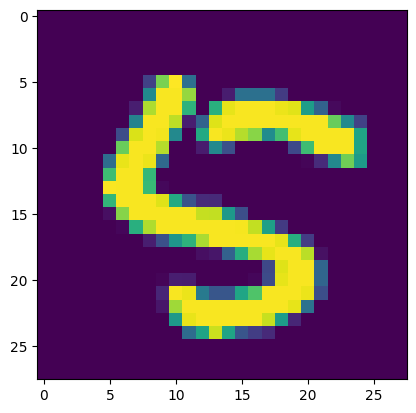

In [50]:
import matplotlib.pyplot as plt

plt.imshow(x[0]) # bc shape is (1,28,28)
plt.show()

In [52]:
total=0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total+=1

print(counter_dict)
total

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


60000

In [54]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001
